# Лабораторная работа #5

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.2803 - loss: 1.9411 - val_accuracy: 0.5208 - val_loss: 1.3675
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4773 - loss: 1.4416 - val_accuracy: 0.5681 - val_loss: 1.1966
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5409 - loss: 1.2891 - val_accuracy: 0.5971 - val_loss: 1.1153
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5764 - loss: 1.2048 - val_accuracy: 0.6327 - val_loss: 1.0469
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6080 - loss: 1.1191 - val_accuracy: 0.6503 - val_loss: 1.0135
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6241 - loss: 1.0733 - val_accuracy: 0.6410 - val_loss: 1.0243
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6415 - loss: 1.0211 - val_accuracy: 0.6784 - val_loss: 0.9252
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6651 - loss: 0.9629 - v

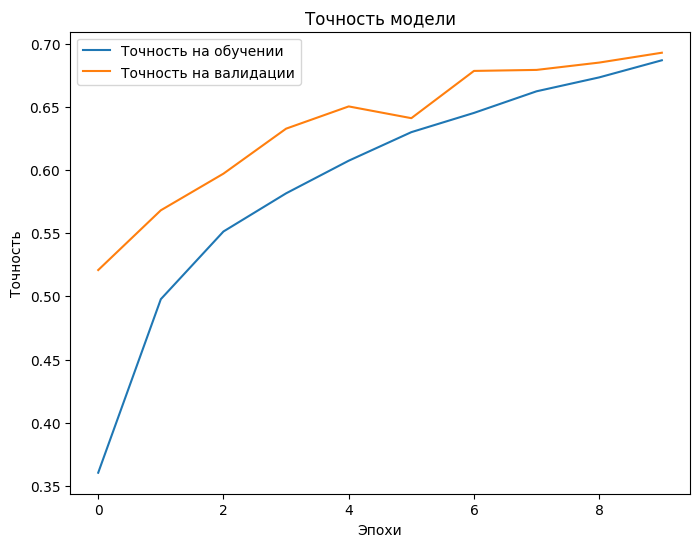

313/313 - 1s - 3ms/step - accuracy: 0.6928 - loss: 0.8908
Тестовая точность: 0.6928


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Загрузка датасета CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Преобразуем входные данные в диапазон от 0 до 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Определяем модель
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Добавляем Dropout для регуляризации
    layers.Dense(10, activation='softmax')
])

# Компилируем модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель и сохраняем историю обучения
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Построение графика точности
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.title('Точность модели')
plt.legend()
plt.show()

# Оцениваем модель на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Тестовая точность: {test_acc:.4f}")